# 1. Load player (without performance) data from PostgreSQL

In [2]:
import psycopg2
import pandas as pd
# from ..transfermarkt.src import config

# Database connection
conn = psycopg2.connect(
    dbname="transfermarkt",
    user="tarik",
    password="123456",
    host="localhost",
    port="5432"
)

# Query to fetch player data
query = "SELECT * FROM players;"
df_players = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display first few rows
print(df_players.head())


   id player_id             name  age                       position height  \
0   1    418560   Erling Haaland   24        Attack - Centre-Forward   1.95   
1   2    371998  Vinicius Junior   24           Attack - Left Winger   1.76   
2   3    937958     Lamine Yamal   17          Attack - Right Winger   1.80   
3   4    581678  Jude Bellingham   21  Midfield - Attacking Midfield   1.86   
4   5    342229    Kylian Mbappé   26        Attack - Centre-Forward   1.78   

    foot                             agent               nationality  \
0   left                   Rafaela Pimenta           England, Norway   
1  right                 Roc Nation Sports             Spain, Brazil   
2   left  Agent is known - Player under 18  Spain, Equatorial Guinea   
3  right                               N/A          Ireland, England   
4  right                         Relatives          France, Cameroon   

   market_value currency market_value_last_update  \
0     200000000        €               

/var/folders/rp/_pbwqjtx19j0m0fzn09kntvc0000gn/T/ipykernel_38754/811784387.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_players = pd.read_sql(query, conn)


### Check for missing values, data types and distribution of the data

In [3]:
print(df_players.info())  # Data types and non-null counts
print(df_players.describe())  # Summary statistics
print(df_players.isnull().sum())  # Missing values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2807 non-null   int64         
 1   player_id                 2807 non-null   object        
 2   name                      2807 non-null   object        
 3   age                       2807 non-null   int64         
 4   position                  2807 non-null   object        
 5   height                    2807 non-null   object        
 6   foot                      2807 non-null   object        
 7   agent                     2807 non-null   object        
 8   nationality               2807 non-null   object        
 9   market_value              2807 non-null   int64         
 10  currency                  2807 non-null   object        
 11  market_value_last_update  2807 non-null   datetime64[ns]
 12  profile_url         

### Visualize the data

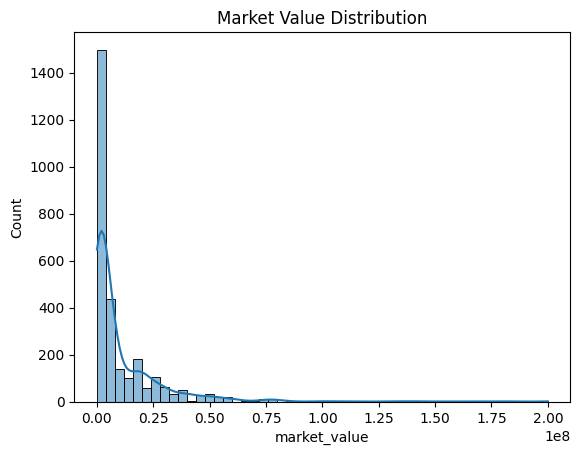

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_players['market_value'], bins=50, kde=True)
plt.title("Market Value Distribution")
plt.show()


# 2. Load player performance data from PostgreSQL

In [5]:
import psycopg2
import pandas as pd
# from ..transfermarkt.src import config

# Database connection
conn = psycopg2.connect(
    dbname="transfermarkt",
    user="tarik",
    password="123456",
    host="localhost",
    port="5432"
)

# Query to fetch player data
query = "SELECT * FROM performances;"
df_performances = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display first few rows
print(df_performances.head())

   id player_id       season            competition  games  goals  assists  \
0   1    418560  Season 2024         Premier League     25     19        3   
1   2    418560  Season 2024  UEFA Champions League      9      8        0   
2   3    418560  Season 2024       Community Shield      1      0        0   
3   4    418560  Season 2024                 FA Cup      0      0        0   
4   5    418560  Season 2024                EFL Cup      0      0        0   

   yellow_cards  second_yellow_cards  red_cards  minutes_played  \
0             2                    0          0            2215   
1             0                    0          0             772   
2             0                    0          0              90   
3             0                    0          0               0   
4             0                    0          0               0   

                  created_at  
0 2025-02-24 19:54:56.380093  
1 2025-02-24 19:54:56.380096  
2 2025-02-24 19:54:56.380097  
3 20

/var/folders/rp/_pbwqjtx19j0m0fzn09kntvc0000gn/T/ipykernel_38754/2644872389.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_performances = pd.read_sql(query, conn)


### Check for missing values, data types and distribution of the data

In [6]:
print(df_performances.info())  # Data types and non-null counts
print(df_performances.describe())  # Summary statistics
print(df_performances.isnull().sum())  # Missing values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40922 entries, 0 to 40921
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   40922 non-null  int64         
 1   player_id            40922 non-null  object        
 2   season               40922 non-null  object        
 3   competition          40922 non-null  object        
 4   games                40922 non-null  int64         
 5   goals                40922 non-null  int64         
 6   assists              40922 non-null  int64         
 7   yellow_cards         40922 non-null  int64         
 8   second_yellow_cards  40922 non-null  int64         
 9   red_cards            40922 non-null  int64         
 10  minutes_played       40922 non-null  int64         
 11  created_at           40922 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 3.7+ MB
None
                 id

### Visualize distribution of the data

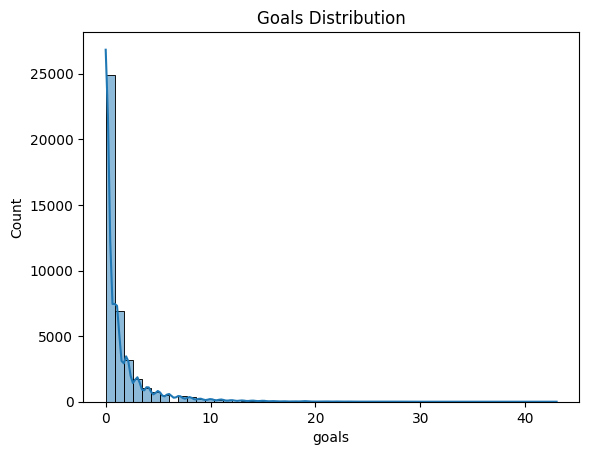

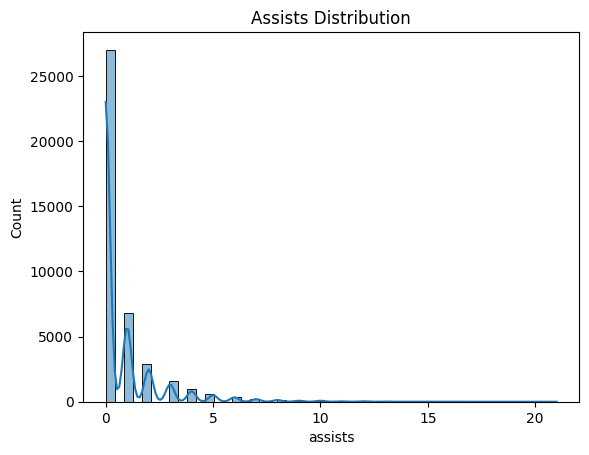

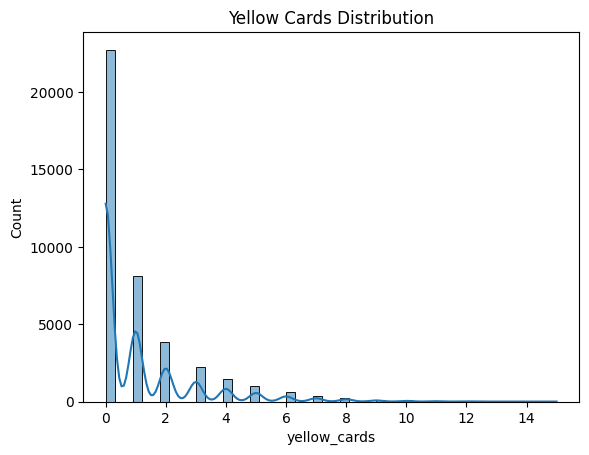

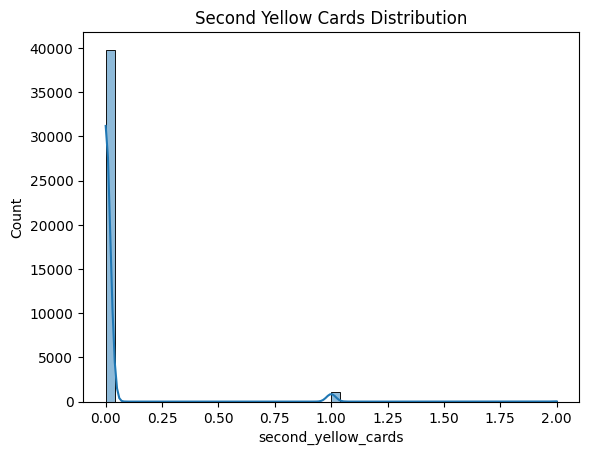

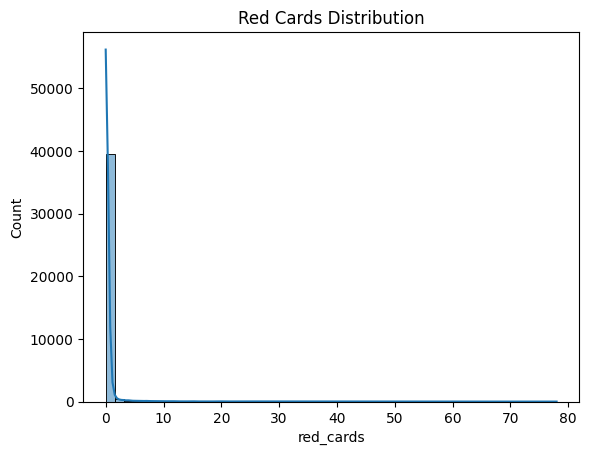

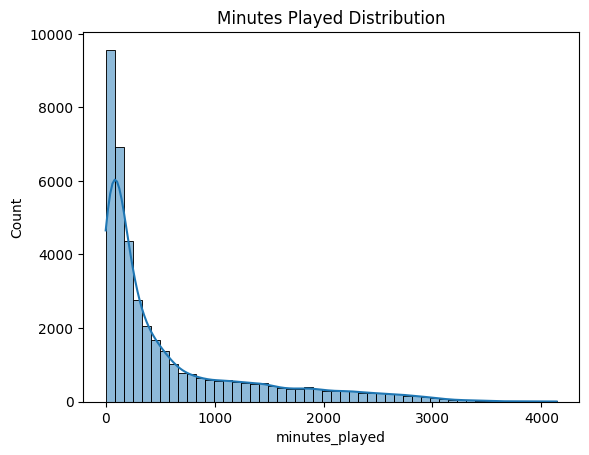

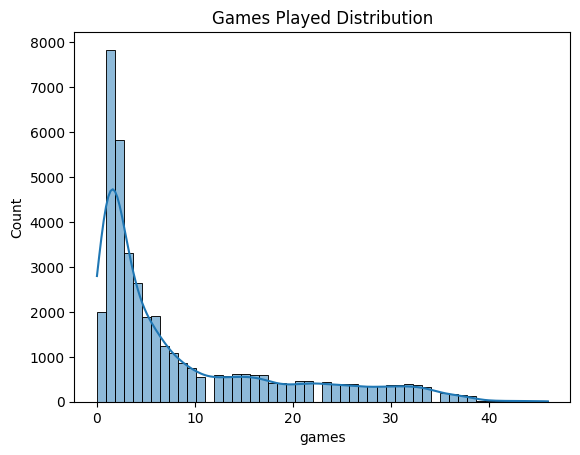

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_performances['goals'], bins=50, kde=True)
plt.title("Goals Distribution")
plt.show()

sns.histplot(df_performances['assists'], bins=50, kde=True)
plt.title("Assists Distribution")
plt.show()

sns.histplot(df_performances['yellow_cards'], bins=50, kde=True)
plt.title("Yellow Cards Distribution")
plt.show()

sns.histplot(df_performances['second_yellow_cards'], bins=50, kde=True)
plt.title("Second Yellow Cards Distribution")
plt.show()

sns.histplot(df_performances['red_cards'], bins=50, kde=True)
plt.title("Red Cards Distribution")
plt.show()

sns.histplot(df_performances['minutes_played'], bins=50, kde=True)
plt.title("Minutes Played Distribution")
plt.show()

sns.histplot(df_performances['games'], bins=50, kde=True)
plt.title("Games Played Distribution")
plt.show()



# 3. Data Preprocessing

### Merge player data with performance data

In [8]:
# All performance data per season, from 2020 to 2024

df_merged = pd.merge(df_players, df_performances, on='player_id', how='left')
df_merged.head()

### Drop unnecessary columns
# df_merged = df_merged.drop(columns=['player_id', 'position', 'nationality', 'foot'])

,id_x,player_id,name,age,position,height,foot,agent,nationality,market_value,...,season,competition,games,goals,assists,yellow_cards,second_yellow_cards,red_cards,minutes_played,created_at_y
0,1,418560,Erling Haaland,24,Attack - Centre-Forward,1.95,left,Rafaela Pimenta,"England, Norway",200000000,...,Season 2024,Premier League,25,19,3,2,0,0,2215,2025-02-24 19:54:56.380093
1,1,418560,Erling Haaland,24,Attack - Centre-Forward,1.95,left,Rafaela Pimenta,"England, Norway",200000000,...,Season 2024,UEFA Champions League,9,8,0,0,0,0,772,2025-02-24 19:54:56.380096
2,1,418560,Erling Haaland,24,Attack - Centre-Forward,1.95,left,Rafaela Pimenta,"England, Norway",200000000,...,Season 2024,Community Shield,1,0,0,0,0,0,90,2025-02-24 19:54:56.380097
3,1,418560,Erling Haaland,24,Attack - Centre-Forward,1.95,left,Rafaela Pimenta,"England, Norway",200000000,...,Season 2024,FA Cup,0,0,0,0,0,0,0,2025-02-24 19:54:56.380098
4,1,418560,Erling Haaland,24,Attack - Centre-Forward,1.95,left,Rafaela Pimenta,"England, Norway",200000000,...,Season 2024,EFL Cup,0,0,0,0,0,0,0,2025-02-24 19:54:56.380099


In [9]:
import numpy as np

# 1. Create season totals for performance metrics
seasons = ['2024', '2023', '2022', '2021', '2020']
metrics = ['games', 'goals', 'assists', 'yellow_cards', 'second_yellow_cards', 'red_cards', 'minutes_played']

# Pivot and sum for each season-metric combination
for season in seasons:
    season_data = df_merged[df_merged['season'] == f'Season {season}']
    for metric in metrics:
        totals = season_data.groupby('player_id')[metric].sum()
        df_merged[f'{metric}_{season}'] = df_merged['player_id'].map(totals)

# 2-4. Create European competition boolean flags
euro_comps = {
    'currently_plays_champions_league': 'UEFA Champions League',
    'currently_plays_europa_league': 'Europa League',
    'currently_plays_conference_league': 'Conference League',
    'currently_plays_bundesliga': 'Bundesliga',
    'currently_plays_serie_a': 'Serie A',
    'currently_plays_ligue_1': 'Ligue 1',
    'currently_plays_premier_league': 'Premier League',
    'currently_plays_laliga': 'LaLiga',
    'currently_plays_liga_portugal': 'Liga Portugal',
    'currently_plays_eredivisie': 'Eredivisie',
    'currently_plays_super_lig': 'Süper Lig',    
}

for col_name, competition in euro_comps.items():
    mask = (df_merged['season'] == 'Season 2024') & (df_merged['competition'] == competition)
    plays_comp = df_merged[mask]['player_id'].unique()
    df_merged[col_name] = df_merged['player_id'].isin(plays_comp)

# Get one row per player
df_final = df_merged.drop(['season', 'competition', 'games', 'goals', 'assists', 
                          'yellow_cards', 'second_yellow_cards', 'red_cards', 
                          'minutes_played'], axis=1).drop_duplicates('player_id')

# add some additional calculated metrics 

# Calculate additional per-90 metrics for each season
for season in seasons:
    # Average minutes per game
    df_final[f'average_minutes_played_per_game_{season}'] = df_final[f'minutes_played_{season}'] / df_final[f'games_{season}']
    
    # Goals per 90
    df_final[f'goals_every_ninety_minutes_{season}'] = (df_final[f'goals_{season}'] * 90) / df_final[f'minutes_played_{season}']
    
    # Assists per 90 
    df_final[f'assists_every_ninety_minutes_{season}'] = (df_final[f'assists_{season}'] * 90) / df_final[f'minutes_played_{season}']
    
    # Yellow cards per 90
    df_final[f'yellow_card_every_ninety_minutes_{season}'] = (df_final[f'yellow_cards_{season}'] * 90) / df_final[f'minutes_played_{season}']
    
    # Second yellow cards per 90
    df_final[f'second_yellow_card_every_ninety_minutes_{season}'] = (df_final[f'second_yellow_cards_{season}'] * 90) / df_final[f'minutes_played_{season}']
    
    # Red cards per 90
    df_final[f'red_card_every_ninety_minutes_{season}'] = (df_final[f'red_cards_{season}'] * 90) / df_final[f'minutes_played_{season}']

# Replace inf values with 0 (occurs when minutes_played is 0)
df_final = df_final.replace([np.inf, -np.inf], 0)

# Fill NaN values with 0 (occurs when dividing by 0)
df_final = df_final.fillna(0)


pd.set_option('display.max_columns', None)
df_final.head(10)

,id_x,player_id,name,age,position,height,foot,agent,nationality,market_value,currency,market_value_last_update,profile_url,created_at_x,updated_at,id_y,created_at_y,games_2024,goals_2024,assists_2024,yellow_cards_2024,second_yellow_cards_2024,red_cards_2024,minutes_played_2024,games_2023,goals_2023,assists_2023,yellow_cards_2023,second_yellow_cards_2023,red_cards_2023,minutes_played_2023,games_2022,goals_2022,assists_2022,yellow_cards_2022,second_yellow_cards_2022,red_cards_2022,minutes_played_2022,games_2021,goals_2021,assists_2021,yellow_cards_2021,second_yellow_cards_2021,red_cards_2021,minutes_played_2021,games_2020,goals_2020,assists_2020,yellow_cards_2020,second_yellow_cards_2020,red_cards_2020,minutes_played_2020,currently_plays_champions_league,currently_plays_europa_league,currently_plays_conference_league,currently_plays_bundesliga,currently_plays_serie_a,currently_plays_ligue_1,currently_plays_premier_league,currently_plays_laliga,currently_plays_liga_portugal,currently_plays_eredivisie,currently_plays_super_lig,average_minutes_played_per_game_2024,goals_every_ninety_minutes_2024,assists_every_ninety_minutes_2024,yellow_card_every_ninety_minutes_2024,second_yellow_card_every_ninety_minutes_2024,red_card_every_ninety_minutes_2024,average_minutes_played_per_game_2023,goals_every_ninety_minutes_2023,assists_every_ninety_minutes_2023,yellow_card_every_ninety_minutes_2023,second_yellow_card_every_ninety_minutes_2023,red_card_every_ninety_minutes_2023,average_minutes_played_per_game_2022,goals_every_ninety_minutes_2022,assists_every_ninety_minutes_2022,yellow_card_every_ninety_minutes_2022,second_yellow_card_every_ninety_minutes_2022,red_card_every_ninety_minutes_2022,average_minutes_played_per_game_2021,goals_every_ninety_minutes_2021,assists_every_ninety_minutes_2021,yellow_card_every_ninety_minutes_2021,second_yellow_card_every_ninety_minutes_2021,red_card_every_ninety_minutes_2021,average_minutes_played_per_game_2020,goals_every_ninety_minutes_2020,assists_every_ninety_minutes_2020,yellow_card_every_ninety_minutes_2020,second_yellow_card_every_ninety_minutes_2020,red_card_every_ninety_minutes_2020
0,1,418560,Erling Haaland,24,Attack - Centre-Forward,1.95,left,Rafaela Pimenta,"England, Norway",200000000,€,2024-12-16,https://www.transfermarkt.com/erling-haaland/p...,2025-02-24 19:54:56.367446,2025-02-24 19:54:56.367469,1,2025-02-24 19:54:56.380093,35.0,27.0,3.0,2.0,0.0,0.0,3077.0,45.0,38.0,5.0,1.0,0.0,0.0,3745.0,53.0,52.0,9.0,6.0,0.0,0.0,4131.0,30.0,29.0,8.0,3.0,0.0,0.0,2388.0,41.0,41.0,12.0,4.0,0.0,0.0,3540.0,True,False,False,False,False,False,True,False,False,False,False,87.914286,0.789730,0.087748,0.058499,0.0,0.000000,83.222222,0.913218,0.120160,0.024032,0.0,0.000000,77.943396,1.132898,0.196078,0.130719,0.0,0.000000,79.600000,1.092965,0.301508,0.113065,0.0,0.0,86.341463,1.042373,0.305085,0.101695,0.000000,0.0
24,2,371998,Vinicius Junior,24,Attack - Left Winger,1.76,right,Roc Nation Sports,"Spain, Brazil",200000000,€,2024-12-27,https://www.transfermarkt.com/vinicius-junior/...,2025-02-24 19:55:04.443972,2025-02-24 19:55:04.443976,25,2025-02-24 19:55:04.446936,33.0,17.0,12.0,11.0,0.0,1.0,2689.0,40.0,25.0,12.0,11.0,0.0,0.0,3174.0,55.0,23.0,21.0,16.0,0.0,1.0,4759.0,52.0,22.0,19.0,7.0,0.0,0.0,4275.0,49.0,6.0,6.0,4.0,0.0,0.0,2722.0,True,False,False,False,False,False,False,True,False,False,False,81.484848,0.568985,0.401636,0.368167,0.0,0.033470,79.350000,0.708885,0.340265,0.311909,0.0,0.000000,86.527273,0.434965,0.397142,0.302585,0.0,0.018912,82.211538,0.463158,0.400000,0.147368,0.0,0.0,55.551020,0.198384,0.198384,0.132256,0.000000,0.0
48,3,937958,Lamine Yamal,17,Attack - Right Winger,1.80,left,Agent is known - Player under 18,"Spain, Equatorial Guinea",180000000,€,2024-12-27,https://www.transfermarkt.com/lamine-yamal/pro...,2025-02-24 19:55:13.953584,2025-02-24 19:55:13.953589,49,2025-02-24 19:55:13.955732,33.0,11.0,16.0,2.0,0.0,0.0,2684.0,50.0,7.0,7.0,6.0,0.0,0.0,2957.0,10.0,0.0,0.0,1.0,0.0,0.0,304.0,0.0,0.0,0.0,0.0,0.0,

### Handle missing values

In [10]:
# Convert height to float and handle N/A values
# First get the median height, excluding N/A values
height_median = pd.to_numeric(df_final['height'].replace('N/A', np.nan), errors='coerce').median()

# Replace N/A with median and convert to float
df_final['height'] = pd.to_numeric(df_final['height'].replace('N/A', height_median), errors='coerce')

# Verify no nulls remain in height column
print("Null values in height column:", df_final['height'].isnull().sum())

# Let's investigate the remaining null value
print("\nRows with null height:")
print(df_final[df_final['height'].isnull()][['name', 'height']])

# Check the original height value before conversion
print("\nOriginal height values for null rows:")
print(df_final[df_final['height'].isnull()]['height'].iloc[0])

# Replace the null height values with the median height
df_final.loc[df_final['height'].isnull(), 'height'] = height_median

# Verify no nulls remain in height column
print("\nNull values in height column after replacement:", df_final['height'].isnull().sum())




Null values in height column: 1

Rows with null height:
                name  height
14339  Adil Boulbina     NaN

Original height values for null rows:
nan

Null values in height column after replacement: 0


In [11]:
# ?

### Convert categorical variables to numerical

In [12]:
# get dummies for position, foot and nationality that needs a special treatment
# Handle nationality separately since it contains multiple values per row
# Split the nationality strings and explode to get one nationality per row

import re

# nationalities = df_final['nationality'].str.split(',\s*').explode().unique()
nationalities = df_final['nationality'].str.split(r',\s*').explode().unique()

# Create dummy columns for each nationality
for nationality in nationalities:
    df_final[f'nationality_{nationality}'] = df_final['nationality'].str.contains(nationality, regex=False).astype(int)

# Create dummies for position and foot (simpler categorical variables)
position_dummies = pd.get_dummies(df_final['position'], prefix='position')
foot_dummies = pd.get_dummies(df_final['foot'], prefix='foot')

# Clean up column names for nationality dummies
nationality_cols = [col for col in df_final.columns if col.startswith('nationality_')]
for col in nationality_cols:
    # Remove 'nationality_' prefix temporarily to clean the name
    clean_name = col.replace('nationality_', '')
    # Convert to lowercase, replace spaces and special chars with underscore
    clean_name = re.sub(r'[^a-zA-Z0-9\s]', '', clean_name)
    clean_name = clean_name.lower().replace(' ', '_')
    # Add prefix back
    new_name = f'nationality_{clean_name}'
    df_final = df_final.rename(columns={col: new_name})

# Clean position dummy column names
position_dummies.columns = [f"position_{re.sub(r'[^a-zA-Z0-9\s]', '', col.replace('position_', '')).lower().replace(' ', '_')}" for col in position_dummies.columns]

# Clean foot dummy column names 
foot_dummies.columns = [f"foot_{re.sub(r'[^a-zA-Z0-9\s]', '', col.replace('foot_', '')).lower().replace(' ', '_')}" for col in foot_dummies.columns]


# Add the dummy columns to df_final
df_final = pd.concat([df_final, position_dummies, foot_dummies], axis=1)

# Drop the original categorical columns
# df_final = df_final.drop(['position', 'foot', 'nationality'], axis=1)

df_final.head(10)


# df_final = pd.get_dummies(df_final, columns=['position', 'foot', 'nationality'], drop_first=True)
# df_final.head(10)


/var/folders/rp/_pbwqjtx19j0m0fzn09kntvc0000gn/T/ipykernel_38754/1025472464.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final[f'nationality_{nationality}'] = df_final['nationality'].str.contains(nationality, regex=False).astype(int)
/var/folders/rp/_pbwqjtx19j0m0fzn09kntvc0000gn/T/ipykernel_38754/1025472464.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final[f'nationality_{nationality}'] = df_final['nationality'].str.contains(nationality, regex=False).astype(int)
/var/folders/rp/_pbwqjtx19j0m0fzn09kntvc0000

,id_x,player_id,name,age,position,height,foot,agent,nationality,market_value,currency,market_value_last_update,profile_url,created_at_x,updated_at,id_y,created_at_y,games_2024,goals_2024,assists_2024,yellow_cards_2024,second_yellow_cards_2024,red_cards_2024,minutes_played_2024,games_2023,goals_2023,assists_2023,yellow_cards_2023,second_yellow_cards_2023,red_cards_2023,minutes_played_2023,games_2022,goals_2022,assists_2022,yellow_cards_2022,second_yellow_cards_2022,red_cards_2022,minutes_played_2022,games_2021,goals_2021,assists_2021,yellow_cards_2021,second_yellow_cards_2021,red_cards_2021,minutes_played_2021,games_2020,goals_2020,assists_2020,yellow_cards_2020,second_yellow_cards_2020,red_cards_2020,minutes_played_2020,currently_plays_champions_league,currently_plays_europa_league,currently_plays_conference_league,currently_plays_bundesliga,currently_plays_serie_a,currently_plays_ligue_1,currently_plays_premier_league,currently_plays_laliga,currently_plays_liga_portugal,currently_plays_eredivisie,currently_plays_super_lig,average_minutes_played_per_game_2024,goals_every_ninety_minutes_2024,assists_every_ninety_minutes_2024,yellow_card_every_ninety_minutes_2024,second_yellow_card_every_ninety_minutes_2024,red_card_every_ninety_minutes_2024,average_minutes_played_per_game_2023,goals_every_ninety_minutes_2023,assists_every_ninety_minutes_2023,yellow_card_every_ninety_minutes_2023,second_yellow_card_every_ninety_minutes_2023,red_card_every_ninety_minutes_2023,average_minutes_played_per_game_2022,goals_every_ninety_minutes_2022,assists_every_ninety_minutes_2022,yellow_card_every_ninety_minutes_2022,second_yellow_card_every_ninety_minutes_2022,red_card_every_ninety_minutes_2022,average_minutes_played_per_game_2021,goals_every_ninety_minutes_2021,assists_every_ninety_minutes_2021,yellow_card_every_ninety_minutes_2021,second_yellow_card_every_ninety_minutes_2021,red_card_every_ninety_minutes_2021,average_minutes_played_per_game_2020,goals_every_ninety_minutes_2020,assists_every_ninety_minutes_2020,yellow_card_every_ninety_minutes_2020,second_yellow_card_every_ninety_minutes_2020,red_card_every_ninety_minutes_2020,nationality_england,nationality_norway,nationality_spain,nationality_brazil,nationality_equatorial_guinea,nationality_ireland,nationality_france,nationality_cameroon,nationality_nigeria,nationality_germany,nationality_uruguay,nationality_argentina,nationality_georgia,nationality_colombia,nationality_ecuador,nationality_angola,nationality_congo,nationality_italy,nationality_suriname,nationality_netherlands,nationality_united_states,nationality_mexico,nationality_japan,nationality_korea,nationality_south,nationality_uzbekistan,nationality_indonesia,nationality_australia,nationality_iran,nationality_scotland,nationality_qatar,nationality_yemen,nationality_united_arab_emirates,nationality_jordan,nationality_syria,nationality_saudi_arabia,nationality_bangladesh,nationality_guinea,nationality_palestine,nationality_denmark,nationality_sudan,nationality_tanzania,nationality_northern_ireland,nationality_cote_divoire,nationality_tunisia,nationality_iraq,nationality_bahrain,nationality_belgium,nationality_egypt,nationality_sweden,nationality_mali,nationality_new_zealand,nationality_tajikistan,nationality_russia,nationality_philippines,nationality_chinese_taipei,nationality_thailand,nationality_china,nationality_peru,nationality_croatia,nationality_ghana,nationality_morocco,nationality_south_africa,nationality_greece,nationality_kyrgyzstan,nationality_lebanon,nationality_malta,nationality_malaysia,nationality_oman,nationality_liberia,nationality_vietnam,nationality_canada,nationality_the_gambia,nationality_senegal,nationality_burkina_faso,nationality_algeria,nationality_dr_congo,nationality_portugal,nationality_guineabissau,nationality_mozambique,nationality_cape_verde,nationality_jamaica,nationality_togo,nationality_burundi,nationality_zambia,nationality_libya,nationality_gabon,nationality_zimbabwe,nationality_kenya,nationality_central

### Feature selection for the model

In [13]:
# Select target variable y
y = df_final['market_value']

# Select features for X
# Get all columns that match our criteria using regex patterns
feature_patterns = [
    '^age$',
    '^height$', 
    '^games_',
    '^goals_',
    '^assists_',
    '^yellow_cards_',
    '^second_yellow_cards_',
    '^red_cards_',
    '^minutes_played_',
    '^position_',
    '^foot_',
    '^nationality_',
    '^currently_plays_'
]

# Combine patterns and select matching columns
X_columns = df_final.columns[
    df_final.columns.str.match('|'.join(feature_patterns))
]

# Create feature matrix X
X = df_final[X_columns]

# Display shapes to verify
print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)

# Display first few feature names to verify selection
print("\nFirst 250 selected features:")
print(X.columns[:250].tolist())



Feature matrix X shape: (2807, 250)
Target vector y shape: (2807,)

First 250 selected features:
['age', 'height', 'games_2024', 'goals_2024', 'assists_2024', 'yellow_cards_2024', 'second_yellow_cards_2024', 'red_cards_2024', 'minutes_played_2024', 'games_2023', 'goals_2023', 'assists_2023', 'yellow_cards_2023', 'second_yellow_cards_2023', 'red_cards_2023', 'minutes_played_2023', 'games_2022', 'goals_2022', 'assists_2022', 'yellow_cards_2022', 'second_yellow_cards_2022', 'red_cards_2022', 'minutes_played_2022', 'games_2021', 'goals_2021', 'assists_2021', 'yellow_cards_2021', 'second_yellow_cards_2021', 'red_cards_2021', 'minutes_played_2021', 'games_2020', 'goals_2020', 'assists_2020', 'yellow_cards_2020', 'second_yellow_cards_2020', 'red_cards_2020', 'minutes_played_2020', 'currently_plays_champions_league', 'currently_plays_europa_league', 'currently_plays_conference_league', 'currently_plays_bundesliga', 'currently_plays_serie_a', 'currently_plays_ligue_1', 'currently_plays_premier_

### Making sure i have no Nulls in the data

In [14]:
# Check for null values in X
print("Columns with null values:")
print(X.isnull().sum()[X.isnull().sum() > 0])

# Check for 'N/A' string values in X 
print("\nColumns containing 'N/A' values:")
na_counts = X.apply(lambda x: (x=='N/A').sum())
print(na_counts[na_counts > 0])

# Print total number of nulls/N/As
print("\nTotal null values:", X.isnull().sum().sum())
print("Total 'N/A' string values:", (X=='N/A').sum().sum())


Columns with null values:
Series([], dtype: int64)

Columns containing 'N/A' values:
Series([], dtype: int64)

Total null values: 0
Total 'N/A' string values: 0


# 4. Model training

### Split the data into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Start with Linear Regression model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel performance without nationality features:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")



Model performance without nationality features:
MAE: 6371335.97
RMSE: 79459962007671.62
R2 Score: 0.61


### Plot a few results

In [17]:
# Create a dataframe with test results
# Get player names from original dataframe
results_df = pd.DataFrame({
    'Player ID': X_test.index,
    'Name': df_final.loc[X_test.index, 'name'],
    'Actual Value': y_test, 
    'Predicted Value': y_pred
})

# Format values to be in millions without decimals
results_df['Actual Value'] = results_df['Actual Value'].astype(int)
results_df['Predicted Value'] = results_df['Predicted Value'].round().astype(int)


# Display first 10 rows
print("\nSample predictions:")
print(results_df.head(20))



Sample predictions:
       Player ID                    Name  Actual Value  Predicted Value
33824      33824          Samuela Nasava         50000          2460812
38574      38574        Eduard Spertsyan      20000000         21793422
24335      24335          Facundo Torres      14000000         19182985
35688      35688         Dominic Solanke      45000000         50701301
29084      29084          Tomás Belmonte       5000000          5623709
9991        9991         Oussama Idrissi       7000000          8783898
3111        3111                Tim Chow       1400000          8592088
24409      24409  Giorgian de Arrascaeta      14000000         19148511
33299      33299          Riley Dalziell         75000          2952245
39269      39269            Aleix García      20000000         28307953
33578      33578        Morgan Wellsbury         75000         -2560593
14346      14346    Abderrazak Hamdallah       2000000         14021736
15023      15023           Edson Álvarez   

### Plot feature importance

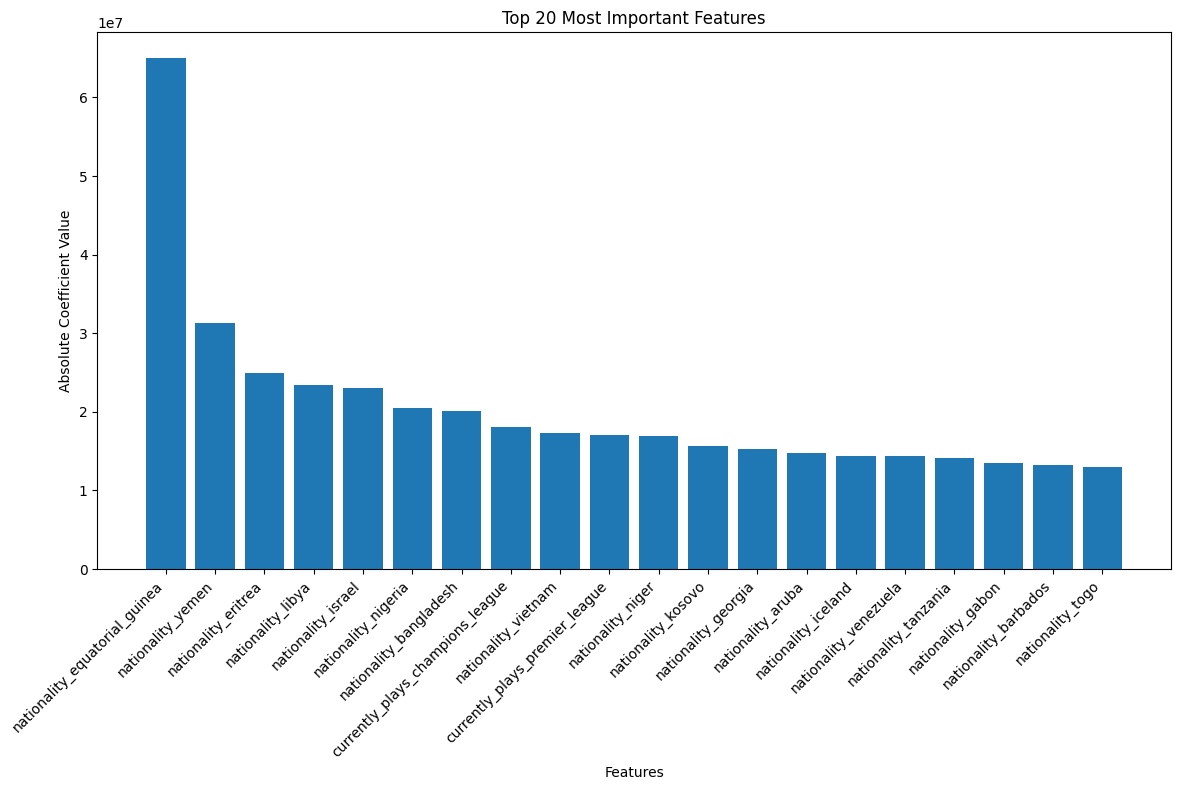


Top 20 most important features:
                              Feature    Importance
62      nationality_equatorial_guinea  6.503857e+07
89                  nationality_yemen  3.126773e+07
217               nationality_eritrea  2.500851e+07
143                 nationality_libya  2.336475e+07
170                nationality_israel  2.298041e+07
66                nationality_nigeria  2.046560e+07
94             nationality_bangladesh  2.012857e+07
37   currently_plays_champions_league  1.804117e+07
128               nationality_vietnam  1.725140e+07
43     currently_plays_premier_league  1.701477e+07
159                 nationality_niger  1.687017e+07
188                nationality_kosovo  1.563136e+07
70                nationality_georgia  1.525553e+07
228                 nationality_aruba  1.481132e+07
176               nationality_iceland  1.441780e+07
193             nationality_venezuela  1.440598e+07
99               nationality_tanzania  1.416803e+07
144                 nationality

In [18]:
# Get feature importance scores
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(model.coef_)
})

# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['Feature'][:20], feature_importance['Importance'][:20])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Important Features')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# Display top 20 features and their importance scores
print("\nTop 20 most important features:")
print(feature_importance.head(20))


### New model with no nationality features as Lamine Yamal seems to be an outlier coming from Equatorial Guinea... 


Model performance without nationality features:
MAE: 6181547.94
RMSE: 79240733452321.88
R2 Score: 0.61

Sample predictions:
       Player                    Name  Actual Value  Predicted Value
33824   33824          Samuela Nasava         50000          1815448
38574   38574        Eduard Spertsyan      20000000         20059977
24335   24335          Facundo Torres      14000000         16354011
35688   35688         Dominic Solanke      45000000         50263317
29084   29084          Tomás Belmonte       5000000          3449010
9991     9991         Oussama Idrissi       7000000         11392380
3111     3111                Tim Chow       1400000          -861349
24409   24409  Giorgian de Arrascaeta      14000000         15043206
33299   33299          Riley Dalziell         75000          3644181
39269   39269            Aleix García      20000000         24000679
33578   33578        Morgan Wellsbury         75000         -1640942
14346   14346    Abderrazak Hamdallah       200

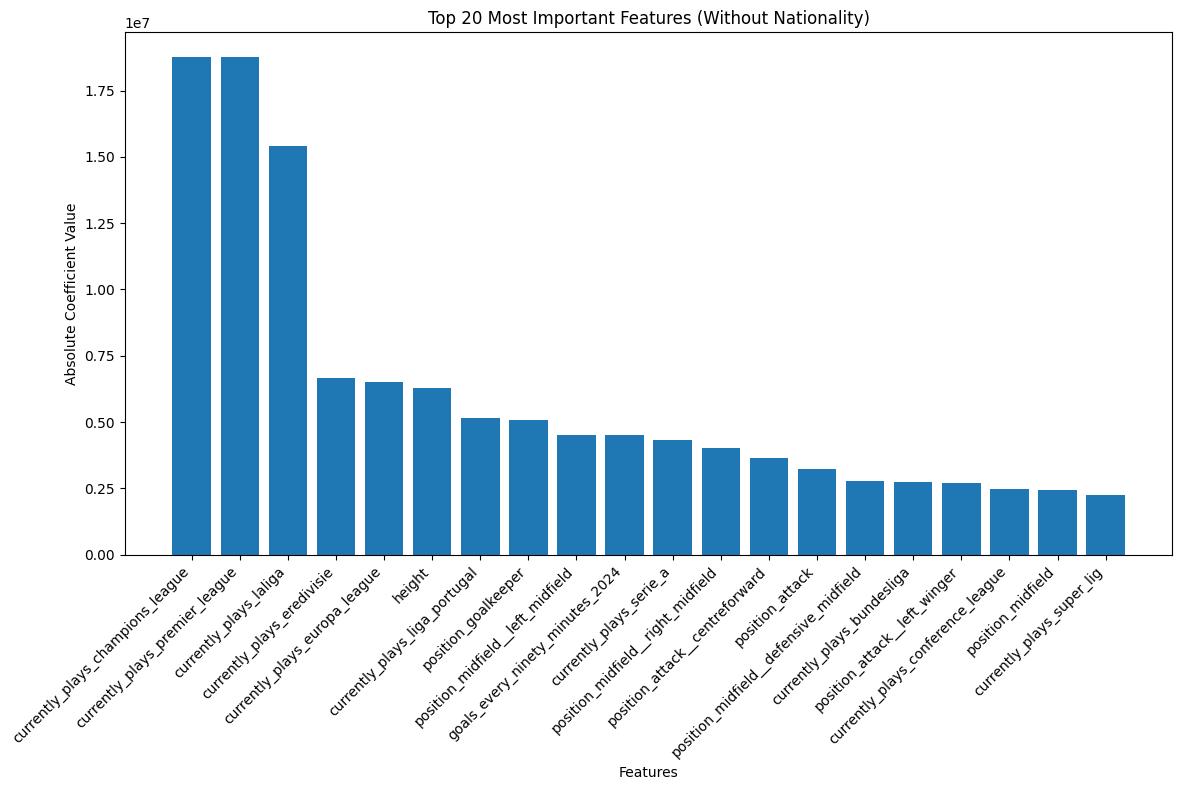


Top 20 most important features:
                                  Feature    Importance
37       currently_plays_champions_league  1.875846e+07
43         currently_plays_premier_league  1.875698e+07
44                 currently_plays_laliga  1.541972e+07
46             currently_plays_eredivisie  6.660167e+06
38          currently_plays_europa_league  6.509269e+06
1                                  height  6.271151e+06
45          currently_plays_liga_portugal  5.139367e+06
67                    position_goalkeeper  5.078065e+06
72       position_midfield__left_midfield  4.507508e+06
48        goals_every_ninety_minutes_2024  4.499580e+06
41                currently_plays_serie_a  4.340830e+06
73      position_midfield__right_midfield  4.008084e+06
59         position_attack__centreforward  3.644782e+06
58                        position_attack  3.246952e+06
71  position_midfield__defensive_midfield  2.782954e+06
40             currently_plays_bundesliga  2.751187e+06
60           po

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Create X2 by dropping nationality columns
nationality_cols = [col for col in X.columns if col.startswith('nationality_')]
X2 = X.drop(columns=nationality_cols)

# Split data
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Train model
model2 = LinearRegression()
model2.fit(X2_train, y_train)

# Make predictions
y_pred2 = model2.predict(X2_test)

# Calculate metrics
mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("\nModel performance without nationality features:")
print(f"MAE: {mae2:.2f}")
print(f"RMSE: {rmse2:.2f}")
print(f"R2 Score: {r2_2:.2f}")

# Create results dataframe
results_df2 = pd.DataFrame({
    'Player': X2_test.index,
    'Name': df_final.loc[X_test.index, 'name'],
    'Actual Value': y_test,
    'Predicted Value': y_pred2
})

# Format values to be in millions without decimals
results_df2['Actual Value'] = results_df2['Actual Value'].astype(int)
results_df2['Predicted Value'] = results_df2['Predicted Value'].round().astype(int)

# Display first 20 rows
print("\nSample predictions:")
print(results_df2.head(20))

# Get feature importance scores
feature_importance2 = pd.DataFrame({
    'Feature': X2_train.columns,
    'Importance': abs(model2.coef_)
})

# Sort by importance
feature_importance2 = feature_importance2.sort_values('Importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12, 8))
plt.bar(feature_importance2['Feature'][:20], feature_importance2['Importance'][:20])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Important Features (Without Nationality)')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# Display top 20 features and their importance scores
print("\nTop 20 most important features:")
print(feature_importance2.head(20))


### New approach with Random Forest Regressor, but still without nationality features


Model Performance Metrics:
  Metric  With Nationality  Without Nationality
0    MAE      4.514675e+06         4.721848e+06
1   RMSE      8.374337e+06         8.349495e+06
2     R2      6.592500e-01         6.612686e-01

Sample predictions (with nationality):
       Player                    Name  Actual Value  Predicted Value
33824   33824          Samuela Nasava         50000            77000
38574   38574        Eduard Spertsyan      20000000          8506500
24335   24335          Facundo Torres      14000000          5737000
35688   35688         Dominic Solanke      45000000         51180000
29084   29084          Tomás Belmonte       5000000          5800500
9991     9991         Oussama Idrissi       7000000          8652000
3111     3111                Tim Chow       1400000          1716000
24409   24409  Giorgian de Arrascaeta      14000000          9147750
33299   33299          Riley Dalziell         75000            62750
39269   39269            Aleix García      20000000

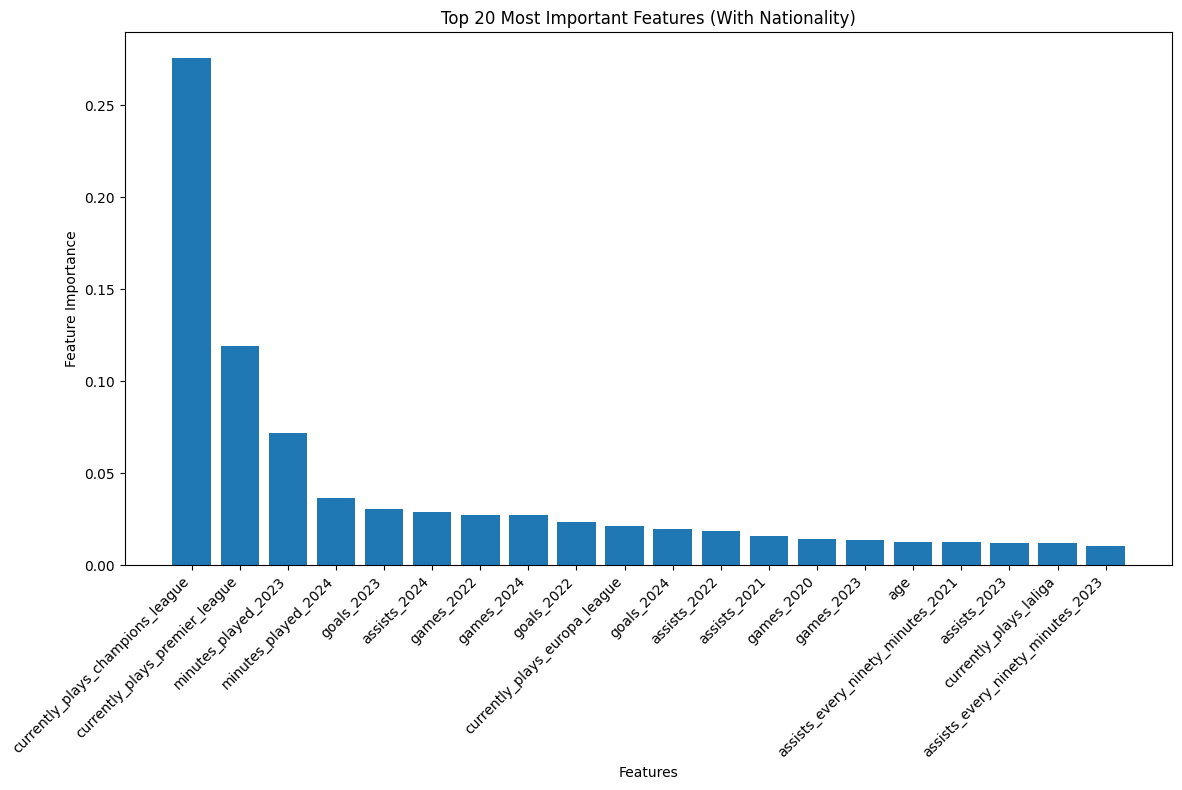

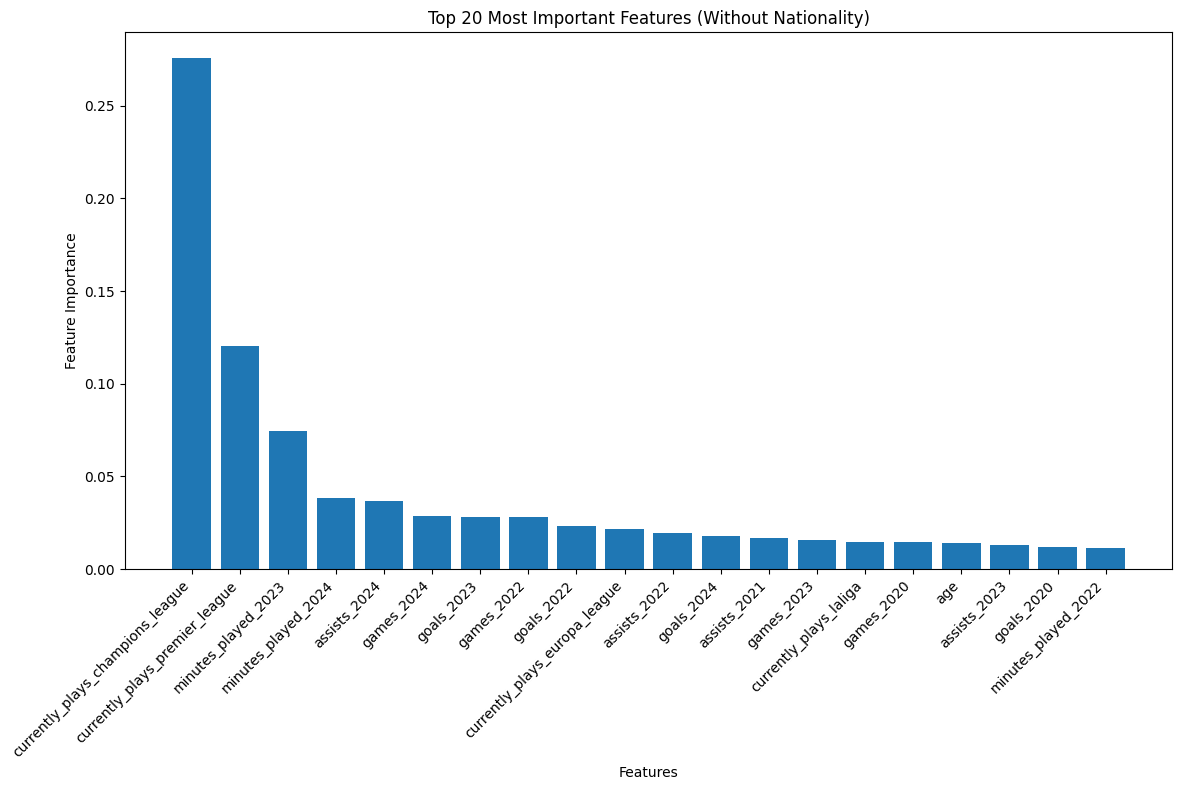


Top 20 most important features (with nationality):
                              Feature  Importance
37   currently_plays_champions_league    0.275816
43     currently_plays_premier_league    0.119222
15                minutes_played_2023    0.071695
8                 minutes_played_2024    0.036448
10                         goals_2023    0.030194
4                        assists_2024    0.029037
16                         games_2022    0.027423
2                          games_2024    0.027295
17                         goals_2022    0.023154
38      currently_plays_europa_league    0.021192
3                          goals_2024    0.019455
18                       assists_2022    0.018254
25                       assists_2021    0.015891
30                         games_2020    0.013976
9                          games_2023    0.013812
0                                 age    0.012274
55  assists_every_ninety_minutes_2021    0.012269
11                       assists_2023    0.01208

In [20]:
# Train Random Forest models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
rf_model.fit(X_train, y_train)
rf_model2.fit(X2_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
rf_pred2 = rf_model2.predict(X2_test)

# Calculate metrics for both models
metrics = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R2'],
    'With Nationality': [
        mean_absolute_error(y_test, rf_pred),
        np.sqrt(mean_squared_error(y_test, rf_pred)),
        r2_score(y_test, rf_pred)
    ],
    'Without Nationality': [
        mean_absolute_error(y_test, rf_pred2),
        np.sqrt(mean_squared_error(y_test, rf_pred2)),
        r2_score(y_test, rf_pred2)
    ]
})

print("Model Performance Metrics:")
print(metrics)

# Create results dataframes
rf_results = pd.DataFrame({
    'Player': X_test.index,
    'Name': df_final.loc[X_test.index, 'name'],
    'Actual Value': y_test,
    'Predicted Value': rf_pred.round().astype(int)
})

rf_results2 = pd.DataFrame({
    'Player': X2_test.index,
    'Name': df_final.loc[X_test.index, 'name'],
    'Actual Value': y_test,
    'Predicted Value': rf_pred2.round().astype(int)
})

print("\nSample predictions (with nationality):")
print(rf_results.head(20))

print("\nSample predictions (without nationality):")
print(rf_results2.head(20))

# Get feature importance for both models
rf_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

rf_importance2 = pd.DataFrame({
    'Feature': X2_train.columns,
    'Importance': rf_model2.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance for model with nationality
plt.figure(figsize=(12, 8))
plt.bar(rf_importance['Feature'][:20], rf_importance['Importance'][:20])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Important Features (With Nationality)')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.tight_layout()
plt.show()

# Plot feature importance for model without nationality
plt.figure(figsize=(12, 8))
plt.bar(rf_importance2['Feature'][:20], rf_importance2['Importance'][:20])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Important Features (Without Nationality)')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.tight_layout()
plt.show()

print("\nTop 20 most important features (with nationality):")
print(rf_importance.head(20))

print("\nTop 20 most important features (without nationality):")
print(rf_importance2.head(20))


### Hyperparameter tuning using grid search

In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with nationality features
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), 
                         param_grid,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get best model and parameters with nationality
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters (with nationality):")
print(best_params)

# Make predictions with best model
rf_predictions_tuned = best_rf_model.predict(X_test)
rf_mse_tuned = mean_squared_error(y_test, rf_predictions_tuned)
rf_rmse_tuned = np.sqrt(rf_mse_tuned)
rf_r2_tuned = r2_score(y_test, rf_predictions_tuned)

print("\nTuned model performance (with nationality):")
print(f"RMSE: {rf_rmse_tuned:.2f}")
print(f"R2 Score: {rf_r2_tuned:.4f}")

# Perform grid search without nationality features
grid_search2 = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid,
                          cv=5, 
                          scoring='neg_mean_squared_error',
                          n_jobs=-1)

grid_search2.fit(X2_train, y_train)

# Get best model and parameters without nationality
best_rf_model2 = grid_search2.best_estimator_
best_params2 = grid_search2.best_params_

print("\nBest parameters (without nationality):")
print(best_params2)

# Make predictions with best model
rf_predictions2_tuned = best_rf_model2.predict(X2_test)
rf_mse2_tuned = mean_squared_error(y_test, rf_predictions2_tuned)
rf_rmse2_tuned = np.sqrt(rf_mse2_tuned)
rf_r2_2_tuned = r2_score(y_test, rf_predictions2_tuned)

print("\nTuned model performance (without nationality):")
print(f"RMSE: {rf_rmse2_tuned:.2f}")
print(f"R2 Score: {rf_r2_2_tuned:.4f}")

# Compare sample predictions
print("\nSample predictions after tuning (with nationality):")
sample_results_tuned = pd.DataFrame({
    'Actual': y_test[:20],
    'Predicted': rf_predictions_tuned[:20],
    'Difference': y_test[:20] - rf_predictions_tuned[:20]
})
print(sample_results_tuned)

print("\nSample predictions after tuning (without nationality):")
sample_results2_tuned = pd.DataFrame({
    'Actual': y_test[:20],
    'Predicted': rf_predictions2_tuned[:20],
    'Difference': y_test[:20] - rf_predictions2_tuned[:20]
})
print(sample_results2_tuned)


Best parameters (with nationality):
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

Tuned model performance (with nationality):
RMSE: 8348405.18
R2 Score: 0.6614

Best parameters (without nationality):
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Tuned model performance (without nationality):
RMSE: 8265653.95
R2 Score: 0.6680

Sample predictions after tuning (with nationality):
         Actual     Predicted    Difference
33824     50000  7.849701e+04 -2.849701e+04
38574  20000000  7.028678e+06  1.297132e+07
24335  14000000  6.106031e+06  7.893969e+06
35688  45000000  5.059354e+07 -5.593539e+06
29084   5000000  6.030436e+06 -1.030436e+06
9991    7000000  6.901814e+06  9.818555e+04
3111    1400000  1.806144e+06 -4.061442e+05
24409  14000000  9.700166e+06  4.299834e+06
33299     75000  6.596613e+04  9.033870e+03
39269  20000000  3.054969e+07 -1.054969e+07
33578     75000  9.239061e+04 -1.739061e+04
14346   2

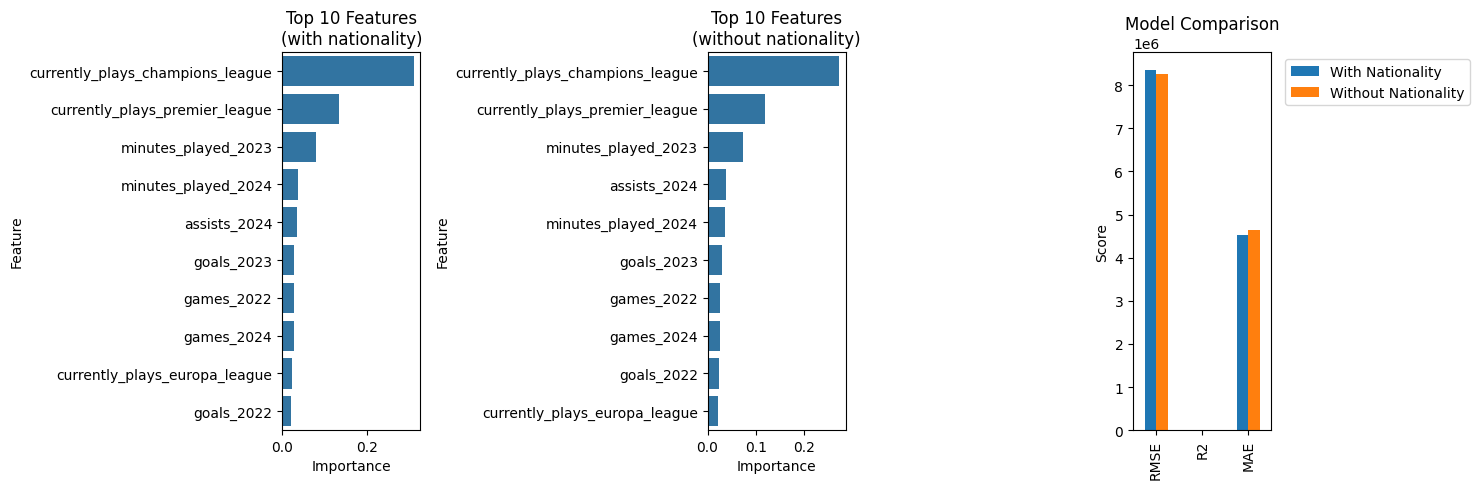


Model with nationality:
MAE: 4533621.15
RMSE: 8348405.18
R2: 0.66

Model without nationality:
MAE: 4645840.39
RMSE: 8265653.95
R2: 0.67


In [22]:
# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot feature importance for model with nationality
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance.head(10), x='importance', y='feature', ax=ax1)
ax1.set_title('Top 10 Features\n(with nationality)')
ax1.set_xlabel('Importance')
ax1.set_ylabel('Feature')

# Plot feature importance for model without nationality 
feature_importance2 = pd.DataFrame({
    'feature': X2.columns,
    'importance': best_rf_model2.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance2.head(10), x='importance', y='feature', ax=ax2)
ax2.set_title('Top 10 Features\n(without nationality)')
ax2.set_xlabel('Importance')
ax2.set_ylabel('Feature')

# Compare model metrics
metrics = pd.DataFrame({
    'With Nationality': [rf_rmse_tuned, rf_r2_tuned, mean_absolute_error(y_test, rf_predictions_tuned)],
    'Without Nationality': [rf_rmse2_tuned, rf_r2_2_tuned, mean_absolute_error(y_test, rf_predictions2_tuned)]
}, index=['RMSE', 'R2', 'MAE'])

metrics.plot(kind='bar', ax=ax3)
ax3.set_title('Model Comparison')
ax3.set_ylabel('Score')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print metrics for both models
print("\nModel with nationality:")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions_tuned):.2f}")
print(f"RMSE: {rf_rmse_tuned:.2f}")
print(f"R2: {rf_r2_tuned:.2f}")

print("\nModel without nationality:")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions2_tuned):.2f}")
print(f"RMSE: {rf_rmse2_tuned:.2f}") 
print(f"R2: {rf_r2_2_tuned:.2f}")



### Keep model with nationality features and package it in a pickle file

In [23]:
import pickle
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the model with nationality features
model_path = '../models/pisoton_random_forest_nation_incl.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(best_rf_model, f)

print(f"Model saved to {model_path}")


Model saved to ../models/pisoton_random_forest_nation_incl.pkl
